In [1]:
x = np.random.uniform(-1, 1, size=100)
x = np.expand_dims(x, 1)

y_true = 3 * np.power(x, 4) + -1 * np.power(x, 2)
noise = np.random.normal(0, 1, size=x.shape[0]) * 0.1
noise = np.expand_dims(noise, 1)
y = y_true + noise

assert y_true[0] + noise[0] == y[0]
assert x.shape[0] == y.shape[0]

In [2]:
i_size = 1
h_size = 10
o_size = 1

In [3]:
#  sample weights from a normal distribution, biases at 0
w0 = np.random.randn(i_size, h_size)
b0 = np.zeros((1, h_size))

w1 = np.random.randn(h_size, o_size)
b1 = np.zeros((1, o_size))

w = [w0, w1]
b = [b0, b1]

In [4]:
n_samples = 4
sample_x, sample_y = x[:n_samples, :], y[:n_samples, :]

In [5]:
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x, 0)

def drelu(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

In [6]:
activation = 'relu'

if activation == 'relu':
    act = relu
    dact = drelu
else:
    act = sigmoid
    dact = dsigmoid

def forward(x, w, b):
    #  input -> hidden
    z0 = x.dot(w[0]) + b[0]
    a0 = act(z0)

    #  hidden -> output
    pred = a0.dot(w[1]) + b[1]
    
    return z0, a0, pred

In [7]:
z0, a0, pred = forward(sample_x, w, b)

In [8]:
def sq_error(pred, y):
    return 1/2 * np.power(pred - y, 2)

def abs_error(pred, y):
    return abs(pred - y)

def error(pred, y):
    return pred - y

In [9]:
lr = 0.0001
reg = 0.01
def backward(w, b, z0, a0, pred, y, x):
    derror = error(pred, y)
    
    dw1 = (a0.T).dot(derror)
    db1 = derror
    
    d1 = derror.dot(w[1].T) * dact(z0)
    dw0 = np.dot(x.T, d1)
    db0 = d1
    
    dw1 += reg * w[1]
    dw0 += reg * w[0]

    w[0] += -lr * dw0
    b[0] += -lr * np.sum(db0, 0, keepdims=True)
    w[1] += -lr * dw1
    b[1] += -lr * np.sum(db1, 0, keepdims=True)
    
    return w, b

In [10]:
hist = []
for _ in range(10000):
    z0, a0, pred = forward(x, w, b)
    hist.append(np.mean(abs_error(pred, y)))
    w, b = backward(w, b, z0, a0, pred, y, x)

In [11]:
_, _, preds = forward(x, w, b)

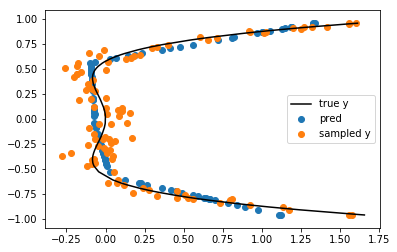

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(preds, x, label='pred')
plt.scatter(y, x, label='sampled y')
plt.plot(
    [y for _, y in sorted(zip(x, y_true))], 
    sorted(x), 
    label='true y', 
    color='black'
)
plt.legend()